### Stock Analysis

Importing Libraries

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hasde\AppData\Local\Temp\ipykernel_26676\2095577025.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(yf.tickers, period='12mo')
[*********************100%***********************]  1 of 1 completed


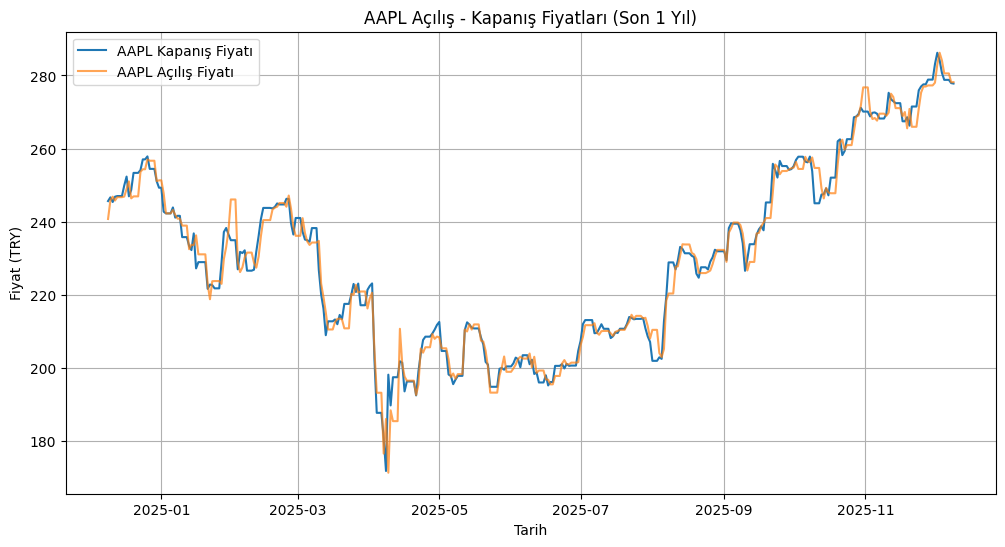

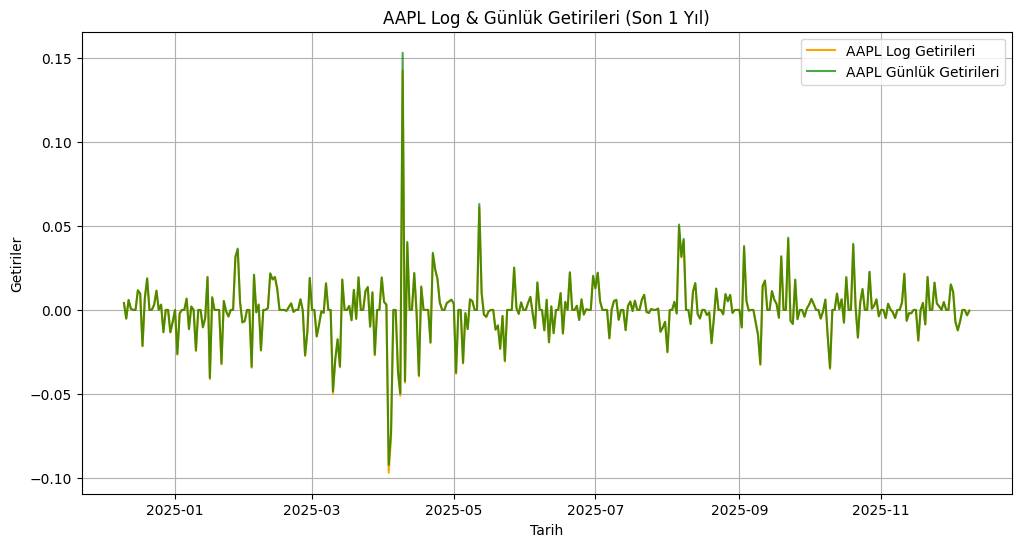

In [22]:
# Define the list of tickers to download
yf.tickers = ["AAPL"]
data = yf.download(yf.tickers, period='12mo')


# ADIM 1: Tüm takvim günlerini oluştur
date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')

# ADIM 2: Boş günleri ekle (reindex)
data_full = data.reindex(date_range)

# ADIM 3: Forward Fill ile doldur
data_clean_ffill = data_full.ffill()


data = data_clean_ffill

#plot of the closing prices
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='AAPL Kapanış Fiyatı')
plt.plot(data.index, data['Open'], label='AAPL Açılış Fiyatı', alpha=0.7)
plt.title('AAPL Açılış - Kapanış Fiyatları (Son 1 Yıl)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TRY)')
plt.legend()
plt.grid()
plt.show()

# Calculate Log Returns and Daily Returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Daily_Returns'] = data['Close'].pct_change()

# plot of log returns & daily returns
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Log_Returns'], label='AAPL Log Getirileri', color='orange')
plt.plot(data.index, data['Daily_Returns'], label='AAPL Günlük Getirileri', color='green', alpha=0.7)
plt.title('AAPL Log & Günlük Getirileri (Son 1 Yıl)')
plt.xlabel('Tarih')
plt.ylabel('Getiriler')
plt.legend()
plt.grid()
plt.show()

# Save to CSV
data.to_csv('GARAN_1Y.csv')

## Üstteki kodun fonksiyona indirgenmiş hali:

In [23]:
def returns_calculator(StockName):
    df = yf.download(StockName, period='12mo')
    df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Daily_Returns'] = df['Close'].pct_change()

    date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    data_full = df.reindex(date_range)
    return df['Log_Returns'], df['Daily_Returns'], df

returns_calculator("THYAO.IS")

C:\Users\hasde\AppData\Local\Temp\ipykernel_26676\1794331866.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(StockName, period='12mo')
[*********************100%***********************]  1 of 1 completed


(Date
 2024-12-09         NaN
 2024-12-10   -0.004168
 2024-12-11    0.006661
 2024-12-12   -0.009171
 2024-12-13    0.002509
                 ...   
 2025-12-03   -0.012624
 2025-12-04   -0.020166
 2025-12-05    0.000925
 2025-12-08    0.007373
 2025-12-09   -0.002759
 Name: Log_Returns, Length: 253, dtype: float64,
 Date
 2024-12-09         NaN
 2024-12-10   -0.004160
 2024-12-11    0.006683
 2024-12-12   -0.009129
 2024-12-13    0.002513
                 ...   
 2025-12-03   -0.012545
 2025-12-04   -0.019964
 2025-12-05    0.000926
 2025-12-08    0.007401
 2025-12-09   -0.002755
 Name: Daily_Returns, Length: 253, dtype: float64,
 Price            Close        High         Low        Open    Volume  \
 Ticker        THYAO.IS    THYAO.IS    THYAO.IS    THYAO.IS  THYAO.IS   
 Date                                                                   
 2024-12-09  293.553711  296.972806  292.332606  296.728585  23749386   
 2024-12-10  292.332581  297.949664  290.867254  293.553686  4037651

## Calculation of Income by Deposited Money

C:\Users\hasde\AppData\Local\Temp\ipykernel_26676\1794331866.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(StockName, period='12mo')
[*********************100%***********************]  1 of 1 completed

1000 TRY yatırımın 100 gün sonraki değeri: 818.027945044974 TRY


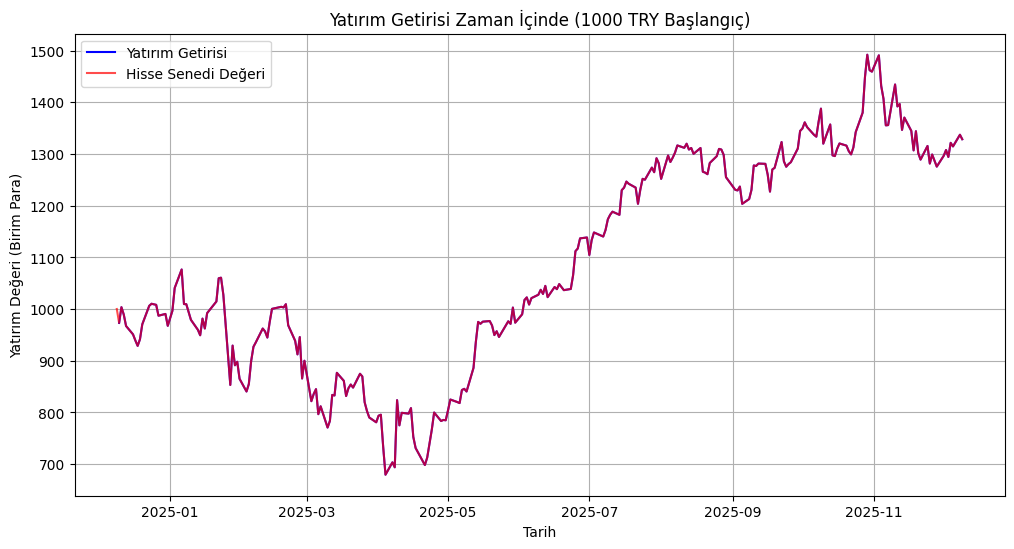

In [26]:
def income(initial_investment, returns, day):
    final_amount = initial_investment * np.exp(returns.cumsum().iloc[day])
    return final_amount

# Calculate returns for NVDA once
log_returns_nvda, daily_returns_nvda, df_nvda = returns_calculator("NVDA")

final_amount = income(1000, log_returns_nvda, 100)
print(f"1000 TRY yatırımın 100 gün sonraki değeri: {final_amount} TRY")


#plot of income over time
plt.figure(figsize=(12,6))
plt.plot(df_nvda.index, income(1000, log_returns_nvda, np.arange(len(df_nvda))), label='Yatırım Getirisi', color='blue')
plt.plot(df_nvda.index, df_nvda['Close'] / df_nvda['Close'].iloc[0] * 1000, label='Hisse Senedi Değeri', color='red', alpha=0.7)
plt.title('Yatırım Getirisi Zaman İçinde (1000 TRY Başlangıç)')
plt.xlabel('Tarih')
plt.ylabel('Yatırım Değeri (Birim Para)')
plt.legend()
plt.grid()
plt.show()